# Audio_Visualizer.ipynb

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
import IPython.display as ipy
import os
import pathlib
import librosa
from librosa import display

In [ ]:
def format_artist(artist):
    return (artist[2:-2].replace("\'", "")).title()

In [ ]:
def select_artist(artists, results):
    artistnames = np.empty_like(artists, dtype=tuple)
    cnt = 0
    for i in artists:
        artistnames[cnt] = (format_artist(i), cnt)
        cnt += 1
    
    interact(plot_song, results=fixed(results), Artist=artistnames);

In [ ]:
def plot_song(results, Artist):
    fig, ax = plt.subplots()

    stats = ('Danceability', 'Energy', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence')
    values = results.loc[:, ['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']]
    values = values.iloc[Artist]
    titlestring = "\"" + (results.iloc[Artist, 1]).title() + "\" by " + ((results.iloc[Artist, 5])[2:-2].replace("\'", "")).title()

    ax.barh(stats, values)
    ax.invert_yaxis()
    ax.set_xlabel('Values')
    ax.set_xlim(left=0.0, right=1.0)
    ax.set_title(titlestring)

    plt.show()

In [ ]:
# Query functions
def submit_query(param):
    ipy.clear_output()
    display(songinput)
    display(button)
    process_query(songinput.value)

def process_query(query):
    # Lower input
    name = query.lower()

    # Lower track names
    lowernames = tracks["name"]
    lowernames = lowernames.str.lower()
    tracks["name"] = lowernames

    # Lower artist names
    lowerartists = tracks["artists"]
    lowerartists = lowerartists.str.lower()
    tracks["artists"] = lowerartists

    # Search query
    songresults = tracks[tracks["name"] == name]
    artistlist = songresults["artists"]

    # Check artist count
    if len(songresults["artists"]) > 1:
        print("Multiple results found. Select an artist:")
        select_artist(artistlist, songresults)
    elif len(songresults["artists"]) < 1:
        print("No results found.")
    else: 
        plot_song(songresults, 0)

In [ ]:
# Query widgets
songinput = widgets.Text(
    description='Song title:',
    disabled=False
)

button = widgets.Button(
    description='Search',
    disabled=False,
    tooltip='Search',
)

In [ ]:
# Open data
tracks = pd.read_csv("data/tracks.csv")

In [ ]:
display(songinput, button)
button.on_click(submit_query)

In [17]:
# Establish input directory
input_dir = pathlib.Path('songs')
if not input_dir.exists():
    os.mkdir('songs')
    
# Search directory and make libraries
input_content = os.listdir(input_dir)
song_waves = np.empty_like(input_content, dtype=np.ndarray)
song_names = np.empty_like(input_content)

cnt = 0
for i in input_content:
    song_waves[cnt], sr = librosa.load(f'songs/{i}')
    song_names[cnt] = i[:-4]
    cnt += 1

In [18]:
for i in song_names:
    print(i)
    
for j in song_waves:
    print(type(j))


000002
000005
000010
000140
000141
000148
000182
000190
000193
000194
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


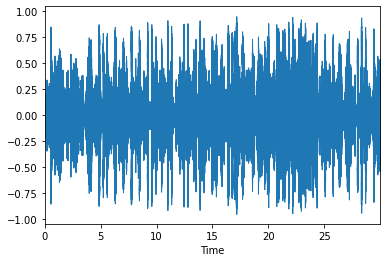

In [24]:
librosa.display.waveplot(song_waves[0])

In [27]:
def interactive_plot(index):
    librosa.display.waveplot(song_waves[index])
    
interact(interactive_plot, index=(0,10))

interactive(children=(IntSlider(value=5, description='index', max=10), Output()), _dom_classes=('widget-intera…

<function __main__.interactive_plot(index)>